In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
df=pd.read_csv('Dataset.csv',names=['Gender','Height','Weight','Index'])
df

,Gender,Height,Weight,Index
0,Male,1.875714,109.721205,4
1,Male,1.747060,73.622879,1
2,Male,1.882397,96.497744,2
3,Male,1.821967,99.809704,3
4,Male,1.774998,93.598806,3
...,...,...,...,...
9995,Female,1.680785,62.041283,1
9996,Female,1.703506,77.504471,4
9997,Female,1.622247,58.275494,2
9998,Female,1.753470,74.322315,3


In [3]:
dummy=df
dummy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
dummy

,Gender,Height,Weight,Index
0,1,1.875714,109.721205,4
1,1,1.747060,73.622879,1
2,1,1.882397,96.497744,2
3,1,1.821967,99.809704,3
4,1,1.774998,93.598806,3
...,...,...,...,...
9995,0,1.680785,62.041283,1
9996,0,1.703506,77.504471,4
9997,0,1.622247,58.275494,2
9998,0,1.753470,74.322315,3


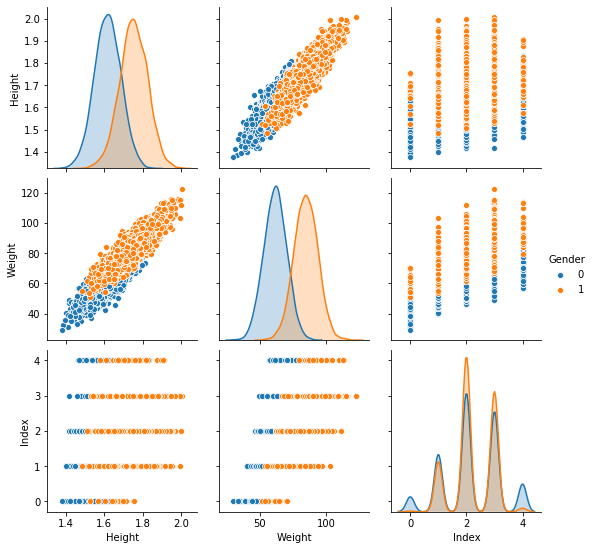

In [4]:
sns.pairplot(df,hue='Gender')

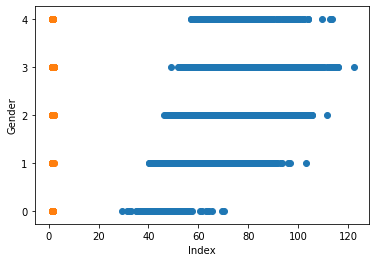

In [5]:
plt.scatter(df.Weight,df.Index)
plt.scatter(df.Height,df.Index)
plt.xlabel('Index')
plt.ylabel('Gender')
plt.show()

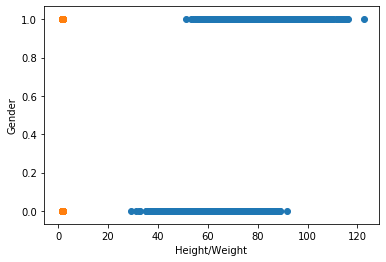

In [6]:
plt.scatter(df.Weight,df.Gender)
plt.scatter(df.Height,df.Gender)
plt.xlabel('Height/Weight')
plt.ylabel('Gender')
plt.show()

In [7]:
def sigmoid(z):
    return 1.0 / (1+np.exp(-z))

In [8]:
np.arange(-10,10,1)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

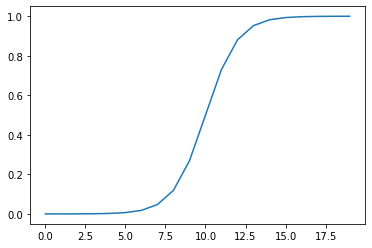

In [9]:
x=list(map(sigmoid,np.arange(-10,10,1)))
plt.plot(x)

In [10]:
x

[4.5397868702434395e-05,
 0.00012339457598623172,
 0.0003353501304664781,
 0.0009110511944006454,
 0.0024726231566347743,
 0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153,
 0.9975273768433653,
 0.9990889488055994,
 0.9996646498695336,
 0.9998766054240137]

In [11]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
X

,Gender,Height,Weight
0,1,1.875714,109.721205
1,1,1.747060,73.622879
2,1,1.882397,96.497744
3,1,1.821967,99.809704
4,1,1.774998,93.598806
...,...,...,...
9995,0,1.680785,62.041283
9996,0,1.703506,77.504471
9997,0,1.622247,58.275494
9998,0,1.753470,74.322315


In [15]:
Y

0       4
1       1
2       2
3       3
4       3
       ..
9995    1
9996    4
9997    2
9998    3
9999    1
Name: Index, Length: 10000, dtype: int64

In [16]:
print(lr.intercept_,lr.coef_)

[ 3.87007524  4.99824572 -1.13134399 -3.11725728 -4.61971969] [[-0.67494947  5.11305685 -0.2189129 ]
 [ 6.74339537  8.52998761 -0.31304262]
 [ 0.83933175  0.8428889   0.02368911]
 [-3.38575278 -7.57927875  0.26425992]
 [-3.52202487 -6.90665461  0.24400649]]


In [17]:
Y_pred=lr.predict(X_test)

In [18]:
metrics.accuracy_score(Y_test,Y_pred)

0.644

In [19]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[  0,  45,   0,   0,   0],
       [  0, 186, 145,   0,   0],
       [  0,  61, 647, 150,   0],
       [  0,   4, 209, 455,   0],
       [  0,   0,   4,  94,   0]], dtype=int64)

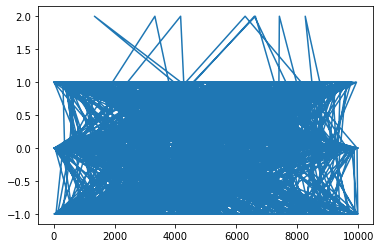

In [47]:
plt.plot(Y_test-Y_pred)

In [39]:
from sklearn.datasets import load_iris

In [40]:
data1=load_iris()

In [42]:
data1.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
x2=[[1,1.3,43]]

In [46]:
lr.predict(x2)

array([1], dtype=int64)

In [47]:
x3=[[0,1.5,100]]

In [48]:
lr.predict(x3)

array([3], dtype=int64)

In [52]:
data1

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
data1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
x1=data1.data
y1=data1.target

In [50]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [51]:
lr1=LogisticRegression()

In [55]:
lr1.fit(x1_train,y1_train)

C:\Users\S K Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y1_pred=lr1.predict(x1_test)

In [57]:
metrics.accuracy_score(y1_test,y1_pred)

0.9666666666666667

In [58]:
y1_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [59]:
y1_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

# Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(Y_test,Y_pred)

array([[  0,  49,   0,   0,   0],
       [  0, 240, 117,   1,   0],
       [  0, 100, 597, 146,   0],
       [  0,   1, 164, 493,   0],
       [  0,   0,   0,  92,   0]], dtype=int64)

In [19]:
print('Mean absolute error :', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean square error :', metrics.mean_absolute_error(Y_test,Y_pred))
print('Root mean square error :', metrics.mean_absolute_error(Y_test,Y_pred))

Mean absolute error : 0.36
Mean square error : 0.36
Root mean square error : 0.36


In [62]:
confusion_matrix(y1_test,y1_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

# Get dummies